In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from sympy import symbols, Eq, solve, summation
from sympy.functions import exp
from scipy.optimize import minimize_scalar
import math
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [3]:
def func(x,Nmax,nbar):
    
    Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))
    n = np.exp(-Nmax*x)*(np.exp((Nmax + 1)*x) -(Nmax+1)*np.exp(x) + Nmax)/(np.exp(x) -1)**2
    
    
    return np.abs(nbar - n/Z)

In [4]:
Nmax=14
nbar=3
res = minimize_scalar(func,args=(Nmax,nbar),bounds=(0, 1), method='bounded')

In [5]:
x = res.x

In [6]:
hbar = 1.054571817e-34
kB = 1.380649e-23
omega = 2*np.pi*1.4*10e6
#x = 0.184132
Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))

T = hbar*omega/(kB*x)
T

0.002527075613606284

In [7]:
P = []
for i in range(Nmax+1): #Nmotion=15 but for <n> =3 keep up to i=10
    P.append(np.exp(-i*x)/Z)

In [8]:
sum(P)

1.0

In [9]:
Pn = []
for i in range(Nmax+1):
    Pn.append(np.exp(-i*x)/Z*i)

In [10]:
sum(Pn) #<n>

2.9999994106949863

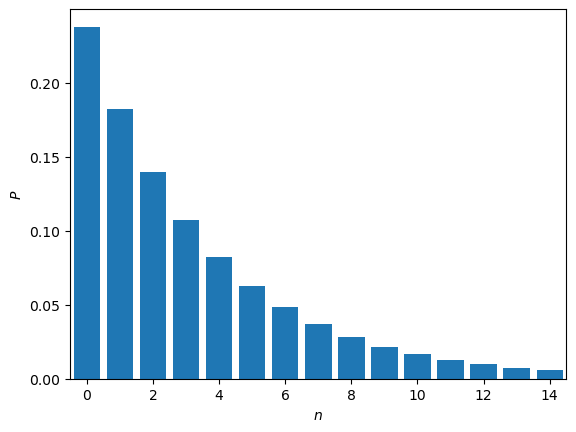

In [11]:
plt.figure()
plt.bar(np.arange(0,Nmax+1),P)
plt.ylabel('$P$')
plt.xlabel('$n$')
plt.xlim(-0.5,Nmax+0.5)
plt.show()

In [12]:
P[-1]

0.005751477788089598

## B = 4G, Δ$_{1,0}$ = 10 ΜHz, Δ$_{1,1}$ = 22.1 ΜHz, Δ$_{1,2}$ = 20 ΜΗz, ω = 1.4 ΜΗz,
## Ω$_{1,0}$ = Ω$_{1,2}$ = 73 ΜHz, Ω$_{1,1}$ = 19 ΜΗz, state 7

In [ ]:
n = []
t = []
n_dev = []
for i in range(Nmax+1):
    t.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 0])
    n.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 1])
    n_dev.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:, 0])

In [14]:
nMC = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC +=np.array(n[i])*P[i]

In [15]:
nMC_dev = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC_dev += np.array(n_dev[i])*P[i]
nMC_dev = nMC_dev/np.sqrt(500-1)

In [ ]:
pops = []
pops_divs = []
for j in range(60):
    pop = []
    pop_div = []
    for i in range(Nmax+1):
        pop.append(P[i]*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:,j+2])
        pop_div.append(P[i]*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:,j+1])
    pop_=np.sum(pop,axis=0)
    pop_div_=np.sum(pop_div,axis=0)
    
    pops.append(pop_)
    pops_divs.append(pop_div_)

pops_divs = pops_divs/np.sqrt(500-1)

In [17]:
plt.rcParams.update({'font.size': 8})

In [18]:
# Get colors from multiple qualitative colormaps
colors = []
colors += list(plt.get_cmap("tab20").colors)   # 20 colors from tab20
colors += list(plt.get_cmap("tab20b").colors)  # 20 colors from tab20b
colors += list(plt.cm.Paired(np.linspace(0,1,12)))
colors += list(plt.get_cmap("tab20c").colors)  # 20 colors from tab20c

In [19]:
len(colors)

72

In [20]:
len(pops)

60

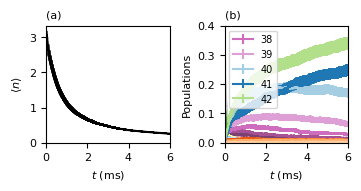

In [21]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(3.5,1.8))

gs = GridSpec(1, 2, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.errorbar(t[0]*1e-3,nMC,yerr = nMC_dev,color='black',ecolor='black')
ax1.set_ylim(0)
ax1.set_xlim(0,6)
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.set_xlabel('$t$ (ms)')



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
for i in range(60):
    ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],color=colors[i])
i=38
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=39
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=40
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=41
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=42
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])

ax3.set_ylabel('Populations')
ax3.set_xlabel('$t$ (ms)')
ax3.set_ylim(0,0.4)
ax3.set_xlim(0,6)
ax3.legend(loc='upper left',prop={'size': 7})


plt.savefig("I7_populations.pdf",bbox_inches = "tight")


plt.show()

In [22]:
pop_cool = []
for i in range(60):
    pop_cool.append(np.average(pops[i]))

In [23]:
pop_cool

[0.0011792390641969844,
 0.0012107611218760176,
 0.0010255929619416102,
 0.0010022121160483766,
 0.0007659574247022892,
 0.000696084652191965,
 0.0005383331434219447,
 0.0004712277077444033,
 0.00040460206684772424,
 0.0004163657977780548,
 0.00038797658897879163,
 0.0003544372343916331,
 0.0002914329008243498,
 0.00031678219672375566,
 0.0002489600098400819,
 0.00987315390235903,
 0.00633404250971594,
 0.004296719532202632,
 0.0031178868028897545,
 0.0022155466618861653,
 0.0018345555407735443,
 0.001450869969824593,
 0.0013864114384715615,
 0.0012158140680596525,
 0.0011109152512098243,
 0.0008674738902752577,
 0.0008715133846191664,
 0.0006337424080750469,
 0.01634014487933862,
 0.007213378885346397,
 0.011053759191608578,
 0.008358395516808595,
 0.010352943371152062,
 0.009769854447761257,
 0.011501916857259112,
 0.013622762792136357,
 0.01861843724887808,
 0.025926024702848872,
 0.04137904118766621,
 0.07802206103546994,
 0.16669095577568177,
 0.17434586060555118,
 0.2524212362010

## Approximation for steady state of full system, pretend initial state at Fock n=3, 250 trajectories

In [ ]:
n50 = []
t50 = []
t50.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_1_improved_step_steady_LD.txt")[:, 0])
n50.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_1_improved_step_steady_LD.txt")[:, 1])
n50.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_2_improved_step_steady_LD.txt")[:, 1])
n50.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_3_improved_step_steady_LD.txt")[:, 1])
n50.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_4_improved_step_steady_LD.txt")[:, 1])
n50.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_5_improved_step_steady_LD.txt")[:, 1])
n50=np.array(n50)
n50 = np.sum(n50,axis=0)/250

In [25]:
n50

array([3.        , 3.18804172, 3.13912405, ..., 0.05804949, 0.05806499,
       0.05815687])

In [ ]:
pop50_1 = []
pop50_2 = []
pop50_3 = []
pop50_4 = []
pop50_5 = []

for j in range(60):
    
    pop50_1.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_1_improved_step_steady_LD.txt")[:,j+2])
    pop50_2.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_2_improved_step_steady_LD.txt")[:,j+2]) 
    pop50_3.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_3_improved_step_steady_LD.txt")[:,j+2])
    pop50_4.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_4_improved_step_steady_LD.txt")[:,j+2])
    pop50_5.append(50*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_3_Gamma_2.44745_ntraj_50_seed_5_improved_step_steady_LD.txt")[:,j+2])

In [28]:
pop50_average = (np.array(pop50_1) + np.array(pop50_2) + np.array(pop50_3) +np.array(pop50_4) +np.array(pop50_5))/250
pop50_average

array([[0.0000000e+00, 9.4152420e-03, 6.2403602e-02, ..., 4.1874000e-05,
        9.4200000e-06, 1.6428000e-05],
       [0.0000000e+00, 1.3716400e-03, 2.8642340e-03, ..., 4.4000000e-07,
        3.6800000e-07, 3.6000000e-07],
       [0.0000000e+00, 3.9092280e-03, 3.9189160e-03, ..., 2.1926000e-05,
        6.6356000e-05, 9.2646000e-05],
       ...,
       [0.0000000e+00, 3.6890100e-03, 2.9967360e-03, ..., 4.1194100e-03,
        4.0342960e-03, 3.9235700e-03],
       [0.0000000e+00, 1.6250000e-04, 2.6933400e-04, ..., 9.2544460e-03,
        9.3287960e-03, 9.2725640e-03],
       [0.0000000e+00, 2.8666400e-04, 5.3007600e-04, ..., 1.3652580e-03,
        1.3239500e-03, 1.3369300e-03]])

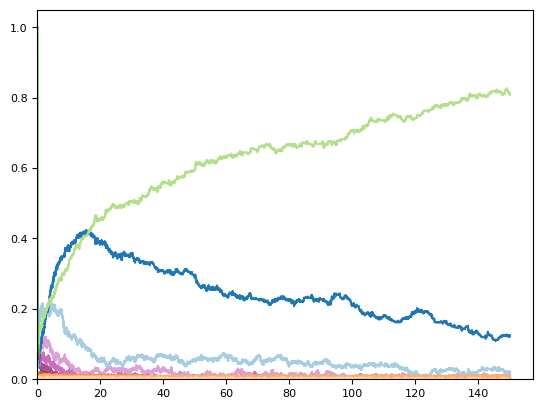

In [29]:
plt.figure()
for i in range(60):
    plt.errorbar(t50[0]*1e-3,pop50_average[i],color=colors[i])
plt.xlim(0)
plt.ylim(0)
plt.show()

In [ ]:
pop50_average[0:60,-1] #steady state

array([1.64280000e-05, 3.60000000e-07, 9.26460000e-05, 1.01800000e-06,
       3.11240000e-05, 2.36400000e-06, 6.23180000e-05, 2.21600000e-06,
       7.31520000e-05, 7.26000000e-07, 7.74720000e-05, 3.16600000e-06,
       5.26600000e-05, 1.64600000e-06, 2.71580000e-05, 5.76120000e-05,
       3.68000000e-07, 1.06765600e-03, 1.16200000e-06, 2.22650000e-04,
       1.77400000e-06, 6.75956000e-04, 6.14000000e-07, 2.70254000e-04,
       1.10800000e-06, 3.68414000e-04, 7.44000000e-07, 9.46540000e-05,
       3.48760000e-05, 1.26923600e-03, 2.50740000e-05, 8.53514000e-04,
       7.35240000e-05, 8.30900000e-04, 3.50722000e-04, 1.85675200e-03,
       1.02940600e-03, 4.75090400e-03, 1.66055800e-03, 2.00082860e-02,
       1.44802820e-02, 1.23917400e-01, 8.08399232e-01, 1.57016000e-04,
       1.47000000e-06, 2.59278000e-04, 4.05400000e-06, 1.58040000e-04,
       1.41940000e-05, 1.40612000e-04, 2.96160000e-05, 1.65340000e-04,
       2.51500000e-05, 2.92932000e-04, 4.31140000e-05, 8.94508000e-04,
      

## Populations no motion

In [ ]:
tnm = np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_Gamma_2.44745_nomo.txt")[:,0]

In [ ]:
popnm = []

for i in range(60):
    popnm.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_73_O11_19_Gamma_2.44745_nomo.txt")[:,i+1])
    

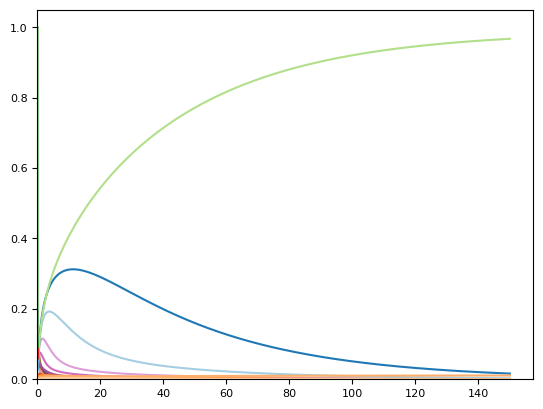

In [35]:
plt.figure()

for j in range(60):
    plt.plot(tnm*1e-3,popnm[j],label=str(j),color=colors[j])
plt.xlim(0)
plt.ylim(0)
plt.show()

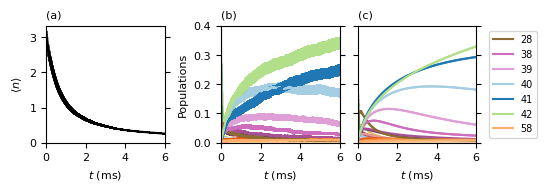

In [37]:


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(5.35,1.8))

gs = GridSpec(1, 3, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.errorbar(t[0]*1e-3,nMC,yerr = nMC_dev,color='black',ecolor='black')
ax1.set_ylim(0)
ax1.set_xlim(0,6)
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.set_xlabel('$t$ (ms)')
ax1.tick_params(axis='y', which='both', left=True, right=True, 
               labelleft=True, labelright=False)



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
for i in range(60):
    ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],color=colors[i])
i=28
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=38
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=39
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=40
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=41
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=42
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=58
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])

ax3.set_ylabel('Populations')
ax3.set_xlabel('$t$ (ms)')
ax3.set_ylim(0,0.4)
ax3.set_xlim(0,6)
ax3.tick_params(axis='y', which='both', left=True, right=True, 
               labelleft=True, labelright=False)
#ax3.legend(loc='upper left',prop={'size': 7})

ax4 = fig.add_subplot(gs[0, 2])
ax4.set_title(r'(c)',loc='left',fontdict={'fontsize': 8})
for i in range(60):
    ax4.plot(tnm*1e-3,popnm[i],color=colors[i])
    #ax4.scatter(tnm[-1]*1e-3,pops_rest[i],color=colors[i],marker='+',s=60)
i=28
ax4.plot(tnm*1e-3,popnm[i],label=i,color=colors[i])
i=38
ax4.plot(tnm*1e-3,popnm[i],label=i,color=colors[i])
i=39
ax4.plot(tnm*1e-3,popnm[i],label=i,color=colors[i])
i=40
ax4.plot(tnm*1e-3,popnm[i],label=i,color=colors[i])
i=41
ax4.plot(tnm*1e-3,popnm[i],label=i,color=colors[i])
i=42
ax4.plot(tnm*1e-3,popnm[i],label=i,color=colors[i])
i=58
ax4.plot(tnm*1e-3,popnm[i],label=i,color=colors[i])
ax4.set_xlabel('$t$ (ms)')
ax4.set_ylim(0,0.4)
ax4.set_xlim(0,6)
#ax4.legend(loc='upper left',prop={'size': 7})
ax4.tick_params(axis='y', which='both', left=True, right=True, 
               labelleft=False, labelright=False)
#ax4.tick_params(left=False, labelleft=False)
ax4.legend(loc='center left',prop={'size': 7},bbox_to_anchor=(1.07, 0.5))


plt.savefig("I7_populations.pdf",bbox_inches = "tight")


plt.show()